<div class="alert alert-block alert-success">
    <h1 align="center">Multiple Lienar regression</h1>
    <h4 align="center"><a href="https://mohammadamirifard.com/">Mohammad Amirifard</a></h5>
</div>

### Problem:
You are an owner of a bike shop.You rent bicycles to customers. Now you want to predict the the number of requsets for bicycles by custonmers based on some information you have. So this is a kind of linear regression with multiple features.

Let's get started with some inforrmation related to culomns exited in the dataset.

##### datetime:
hourly date + timestamp  
##### season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 
##### holiday:
whether the day is considered a holiday
##### workingday:
whether the day is neither a weekend nor holiday
##### weather:
(1 = Clear, Few clouds, Partly cloudy, Partly cloudy)(2 =  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) (3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
(4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
##### temp:
temperature in Celsius
##### atemp:
"feels like" temperature in Celsius
##### humidity:
relative humidity
##### windspeed:
wind speed
##### casual:
number of non-registered user rentals initiated
##### registered:
number of registered user rentals initiated
##### count:
number of total rentals


<div class="alert alert-block alert-success">
    <h1 align="center">Let's get started</h1>
    <h2 align="center">Step1: Import libararies</h2>
</div> 

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

<div class="alert alert-block alert-success">
    <h2 align="center">Step2: Load dataset and EDA</h2>
</div> 

In [2]:
# Load dataset
data_unseen =  pd.read_csv('test.csv')
data = pd.read_csv('train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# As we understood, there is no null value in our data. Great Luck
# No we must change the type of columns to suitable value to use less memory
for i in data.columns:
    if i== 'datetime': # Here I decided to split date form time in first column and create two new cloumns
        data[f'{i}'] = data[f'{i}'].astype('datetime64')
        data['date'] = [d.date() for d in data['datetime']]
        data['time'] = [d.time() for d in data['datetime']]
        # In this step, I change the order of columns:
        data = data[['date','time', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',]]
    elif i in ['temp','atemp', 'windspeed']:
        data[f'{i}'] = data[f'{i}'].astype('float16')
    else:
        data[f'{i}'] = data[f'{i}'].astype('int16')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10886 non-null  object 
 1   time        10886 non-null  object 
 2   season      10886 non-null  int16  
 3   holiday     10886 non-null  int16  
 4   workingday  10886 non-null  int16  
 5   weather     10886 non-null  int16  
 6   temp        10886 non-null  float16
 7   atemp       10886 non-null  float16
 8   humidity    10886 non-null  int16  
 9   windspeed   10886 non-null  float16
 10  casual      10886 non-null  int16  
 11  registered  10886 non-null  int16  
 12  count       10886 non-null  int16  
dtypes: float16(3), int16(8), object(2)
memory usage: 404.1+ KB


In [6]:
# Weel down, we could optimize the useage of memory.Let's take a look a data again
data.head(3)

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,1,0,0,1,9.843750,14.398438,81,0.0,3,13,16
1,2011-01-01,01:00:00,1,0,0,1,9.023438,13.632812,80,0.0,8,32,40
2,2011-01-01,02:00:00,1,0,0,1,9.023438,13.632812,80,0.0,5,27,32


In [7]:
# Summary Statistics
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,1.088600e+04,1.088600e+04,10886.000000,1.088600e+04,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,inf,inf,61.886460,inf,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.789062e+00,8.476562e+00,19.245033,8.164062e+00,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,8.198242e-01,7.597656e-01,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,1.393750e+01,1.667188e+01,47.000000,7.000000e+00,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,2.050000e+01,2.423438e+01,62.000000,1.300000e+01,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,2.623438e+01,3.106250e+01,77.000000,1.700000e+01,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,4.100000e+01,4.546875e+01,100.000000,5.700000e+01,367.000000,886.000000,977.000000


<div class="alert alert-block alert-success">
    <h2 align="center">Step3: Recognize missing values</h2>
</div> 

In [8]:
# To check the number of missing values
data.isnull().sum()

date          0
time          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<div class="alert alert-block alert-success">
    <h2 align="center">Step4: Visualize data for better understand</h2>
</div> 

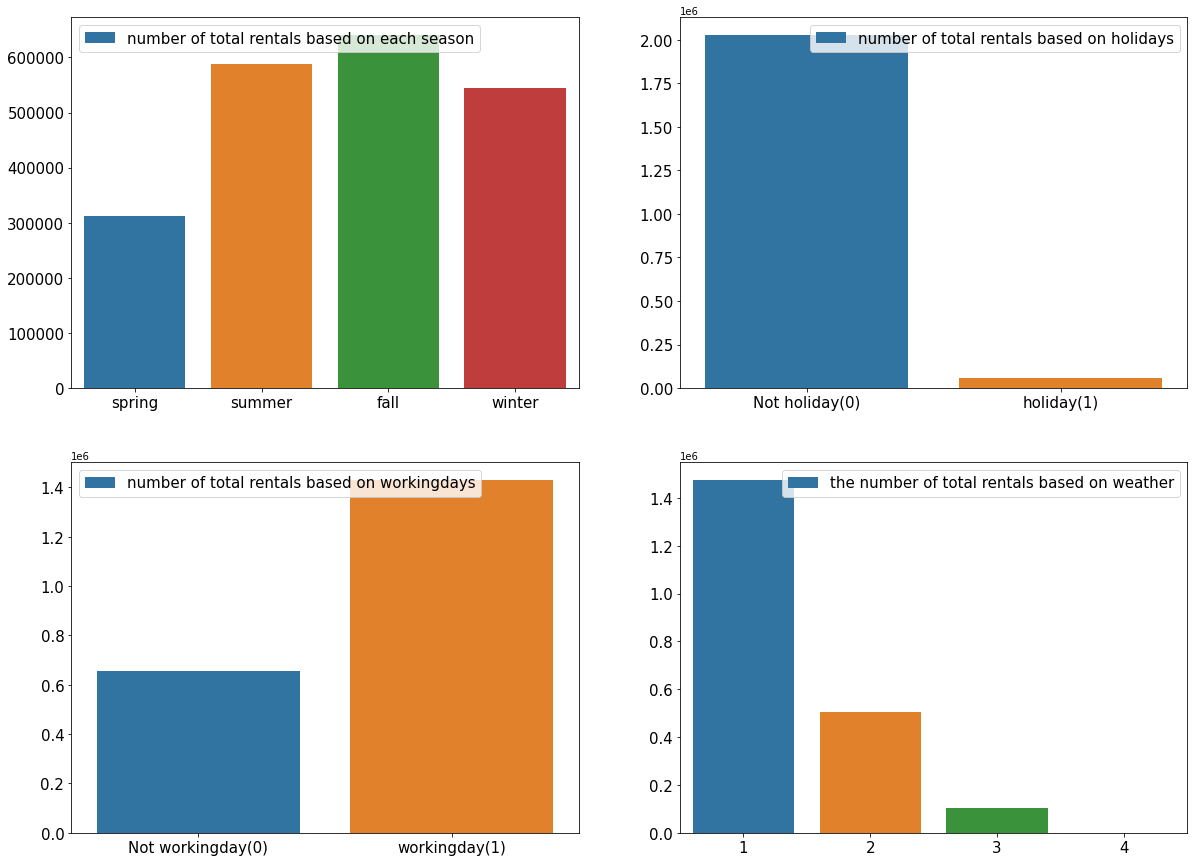

In [9]:
# See some usefull graphs
fig , axes = plt.subplots(2,2,figsize=(20,15))

# Axes[0,0]: Here I want to compare the number of total rentals based on each season
number_of_total_rentals = []
for i in (data.season.unique()):
    number_of_total_rentals.append(data[data.season==i]['count'].sum())
    
sns.barplot(ax=axes[0,0],x=['spring','summer','fall','winter'], y=number_of_total_rentals, label='number of total rentals based on each season',
            )
axes[0,0].legend(loc=2, fontsize=15)
axes[0,0].tick_params(axis='both', which='major', labelsize=15)
# Axes[0,1]: Here I want to compare the number of total rentals based on holidays
number_of_total_rentals = []
for i in (data.holiday.unique()):
    number_of_total_rentals.append(data[data.holiday==i]['count'].sum())

sns.barplot(ax= axes[0,1],x=['Not holiday(0)','holiday(1)'], y=number_of_total_rentals, label='number of total rentals based on holidays')
axes[0,1].legend(loc=1, fontsize=15)
axes[0,1].tick_params(axis='both', which='major', labelsize=15)
# Axes[1,0]: Here I want to compare the number of total rentals based on workingdays
number_of_total_rentals = []
for i in (data.workingday.unique()):
    number_of_total_rentals.append(data[data.workingday==i]['count'].sum())
    
sns.barplot(ax=axes[1,0],x=['Not workingday(0)','workingday(1)'], y=number_of_total_rentals, label='number of total rentals based on workingdays')
axes[1,0].legend(loc=2, fontsize=15)
axes[1,0].tick_params(axis='both', which='major', labelsize=15)
# Axes[1,1]: Here I want to compare the number of total rentals based on weather
number_of_total_rentals= []
for i in (data.weather.unique()):
    number_of_total_rentals.append(data[data.weather==i]['count'].sum())

sns.barplot(ax=axes[1,1],x=['1','2','3','4'], y=number_of_total_rentals, label='the number of total rentals based on weather')
axes[1,1].legend(loc=1, fontsize=15)
axes[1,1].tick_params(axis='both', which='major', labelsize=15)

<AxesSubplot:>

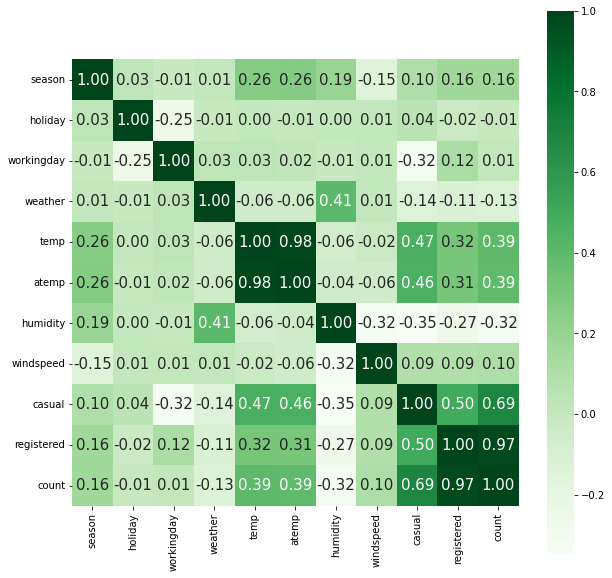

In [10]:
# Find the correlation between parameters
my_correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_correlation,cbar=True, square= True, fmt='.2f', annot=True,annot_kws={'size':15}, cmap='Greens')

In [11]:
my_correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258672,0.264735,0.190610,-0.147123,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000299,-0.005219,0.001929,0.008407,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029951,0.024673,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055052,-0.055345,0.406244,0.007264,-0.135918,-0.109340,-0.128655
temp,0.258672,0.000299,0.029951,-0.055052,1.000000,0.984952,-0.064979,-0.017837,0.467116,0.318571,0.394459
atemp,0.264735,-0.005219,0.024673,-0.055345,0.984952,1.000000,-0.043490,-0.057484,0.462032,0.314610,0.389753
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064979,-0.043490,1.000000,-0.318605,-0.348187,-0.265458,-0.317371
windspeed,-0.147123,0.008407,0.013373,0.007264,-0.017837,-0.057484,-0.318605,1.000000,0.092277,0.091051,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467116,0.462032,-0.348187,0.092277,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314610,-0.265458,0.091051,0.497250,1.000000,0.970948


<div class="alert alert-block alert-success">
    <h2 align="center">Step5: Train the model with different models</h2>
</div> 

### 1st model---->Linear Regression

In [47]:
# Define feature and target: According to the determined correlation, I chose the column temp as our feature and count as our target
x= data[['temp']]
y= data[['count']]

# Splitting data to training and testing data
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=4)
x_train.head(3)

,temp
3036,27.062500
4817,20.500000
5745,9.023438


In [48]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [49]:
regressor.coef_

array([[9.118423]], dtype=float32)

In [50]:
regressor.intercept_

array([6.441971], dtype=float32)

In [51]:
y_predicted = regressor.predict(x_test)

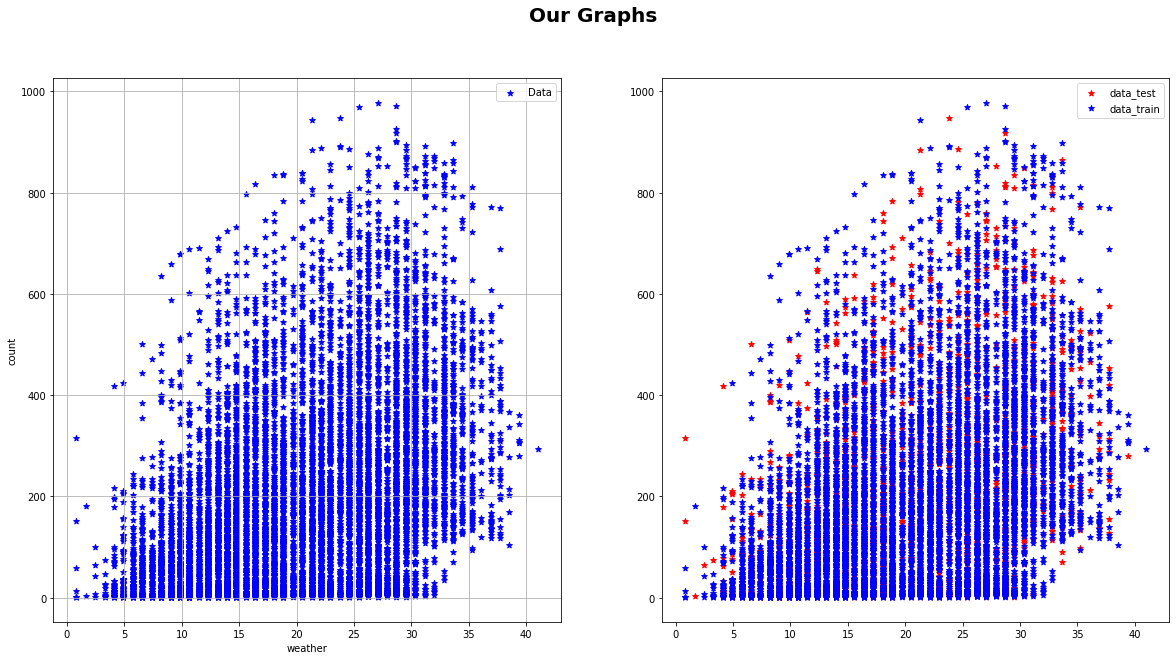

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Our Graphs', fontweight='bold', fontsize=20)
# Step2: Set properties for the left plot
axs[0].scatter(x=x, y=y, c='blue', marker='*', linewidths=1, label='Data')
axs[0].grid()
axs[0].set(xlabel='weather', ylabel='count')
axs[0].legend()
axs[1].scatter(x=x_test, y=y_test, c='red', marker='*', linewidths=1, label='data_test')
axs[1].scatter(x=x_train, y=y_train, c='blue', marker='*', linewidths=1, label='data_train')
axs[1].legend()

<AxesSubplot:ylabel='Count'>

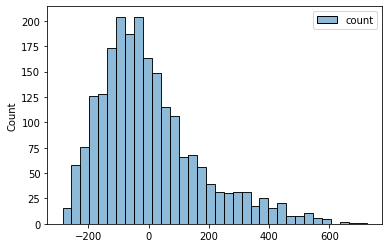

In [53]:
sns.histplot(y_test-y_predicted)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 128.11705
Mean Squared Error: 28353.418
Root Mean Squared Error: 168.38474
